In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('50_Startups.csv')

In [4]:
df.sample(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
10,101913.08,110594.11,229160.95,Florida,146121.95
41,27892.92,84710.77,164470.71,Florida,77798.83
3,144372.41,118671.85,383199.62,New York,182901.99
43,15505.73,127382.30,35534.17,New York,69758.98
20,76253.86,113867.30,298664.47,California,118474.03


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [7]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


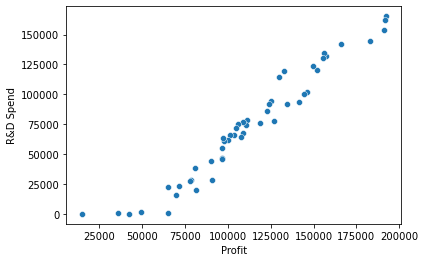

In [8]:
sns.scatterplot(data = df, x = 'Profit', y = 'R&D Spend')
plt.show()

<AxesSubplot:xlabel='Profit', ylabel='R&D Spend'>

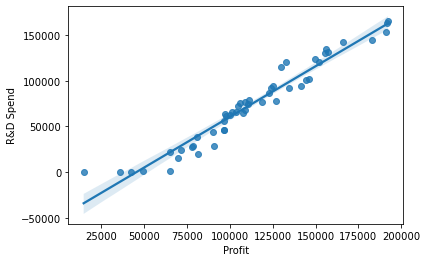

In [9]:
sns.regplot(data = df, x = 'Profit', y = 'R&D Spend')

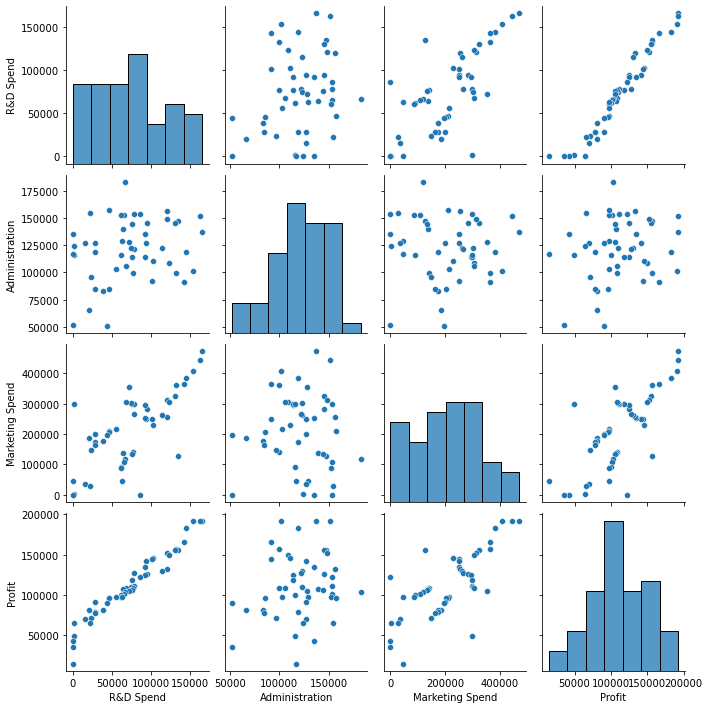

In [10]:
sns.pairplot(df)
plt.show()

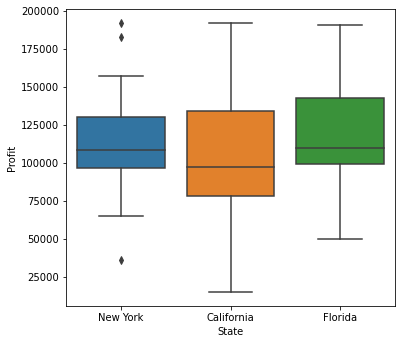

In [11]:
plt.figure(figsize = (20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'State', y = 'Profit', data = df)
plt.show()

In [12]:
cor = df.corr()

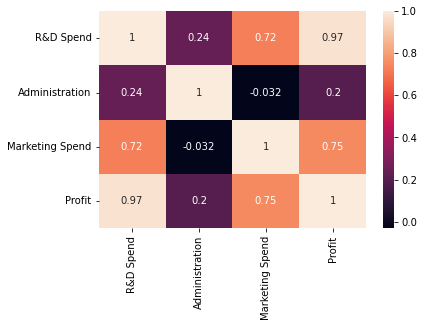

In [13]:
sns.heatmap(cor, annot = True)
plt.show()

In [14]:
## Get the dummy variables for the featur 'furnishingstatus' and store it in a new variable - 'status'
df1 = pd.get_dummies(df['State'])

In [15]:
df1.sample(5)

,California,Florida,New York
39,1,0,0
25,1,0,0
2,0,1,0
31,0,0,1
0,0,0,1


In [16]:
df = pd.concat([df, df1], axis = 1)

In [17]:
df.sample(5)

,R&D Spend,Administration,Marketing Spend,State,Profit,California,Florida,New York
49,0.00,116983.80,45173.06,California,14681.40,1,0,0
42,23640.93,96189.63,148001.11,California,71498.49,1,0,0
14,119943.24,156547.42,256512.92,Florida,132602.65,0,1,0
5,131876.90,99814.71,362861.36,New York,156991.12,0,0,1
20,76253.86,113867.30,298664.47,California,118474.03,1,0,0


In [18]:
# Drop 'state' as we habe created the dummies for it
df.drop(['State'], axis = 1, inplace = True)

In [19]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


# Split Data vertically

In [20]:
y  = df.pop('Profit')
X= df

In [21]:
X

,R&D Spend,Administration,Marketing Spend,California,Florida,New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0
5,131876.90,99814.71,362861.36,0,0,1
6,134615.46,147198.87,127716.82,1,0,0
7,130298.13,145530.06,323876.68,0,1,0
8,120542.52,148718.95,311613.29,0,0,1
9,123334.88,108679.17,304981.62,1,0,0


In [22]:
y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

# Split Train Test Data

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.80, test_size = 0.20, random_state = 20)

In [25]:
X_train

,R&D Spend,Administration,Marketing Spend,California,Florida,New York
40,28754.33,118546.05,172795.67,1,0,0
17,94657.16,145077.58,282574.31,0,0,1
18,91749.16,114175.79,294919.57,0,1,0
0,165349.20,136897.80,471784.10,0,0,1
27,72107.60,127864.55,353183.81,0,0,1
33,55493.95,103057.49,214634.81,0,1,0
36,28663.76,127056.21,201126.82,0,1,0
42,23640.93,96189.63,148001.11,1,0,0
10,101913.08,110594.11,229160.95,0,1,0
3,144372.41,118671.85,383199.62,0,0,1


In [26]:
y_train

40     78239.91
17    125370.37
18    124266.90
0     192261.83
27    105008.31
33     96778.92
36     90708.19
42     71498.49
10    146121.95
3     182901.99
41     77798.83
13    134307.35
46     49490.75
2     191050.39
38     81229.06
39     81005.76
5     156991.12
43     69758.98
37     89949.14
30     99937.59
6     156122.51
29    101004.64
16    126992.93
19    122776.86
49     14681.40
44     65200.33
21    111313.02
32     97427.84
34     96712.80
7     155752.60
22    110352.25
11    144259.40
20    118474.03
9     149759.96
48     35673.41
28    103282.38
31     97483.56
15    129917.04
26    105733.54
35     96479.51
Name: Profit, dtype: float64

In [27]:
X_test

,R&D Spend,Administration,Marketing Spend,California,Florida,New York
12,93863.75,127320.38,249839.44,0,1,0
14,119943.24,156547.42,256512.92,0,1,0
4,142107.34,91391.77,366168.42,0,1,0
8,120542.52,148718.95,311613.29,0,0,1
45,1000.23,124153.04,1903.93,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
25,64664.71,139553.16,137962.62,1,0,0
24,77044.01,99281.34,140574.81,0,0,1
47,0.00,135426.92,0.00,1,0,0
23,67532.53,105751.03,304768.73,0,1,0


In [28]:
y_test

12    141585.52
14    132602.65
4     166187.94
8     152211.77
45     64926.08
1     191792.06
25    107404.34
24    108552.04
47     42559.73
23    108733.99
Name: Profit, dtype: float64

# Using MinMax Scaler

In [29]:
num_vars = ['R&D Spend', 'Administration', 'Marketing Spend']

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scalar = MinMaxScaler()

In [32]:
X_train[num_vars] = scalar.fit_transform(X_train[num_vars])  ## scaling X_train

In [33]:
X_test[num_vars] = scalar.transform(X_test[num_vars]) ## scaling test

In [34]:
y_train = scalar.fit_transform(y_train.values.reshape(-1, 1))

In [35]:
y_test = scalar.transform(y_test.values.reshape(-1, 1))

# Building a Model

## Filling the Model

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lr = LinearRegression()

## Train the model

In [38]:
lr.fit(X_train,y_train)

LinearRegression()

# Model evaluate

In [39]:
y_pred = lr.predict(X_test)

In [40]:
y_pred

array([[0.65395373],
       [0.77109522],
       [0.90495419],
       [0.77046039],
       [0.1687776 ],
       [0.99284813],
       [0.49033779],
       [0.55110389],
       [0.16742975],
       [0.54333896]])

In [41]:
y_test

array([[0.71462897],
       [0.66404417],
       [0.85317138],
       [0.77446805],
       [0.28294041],
       [0.99735461],
       [0.52214616],
       [0.52860915],
       [0.15698988],
       [0.52963376]])

## MSE

In [42]:
from sklearn.metrics import mean_squared_error

In [43]:
MSE = mean_squared_error(y_test, y_pred)

In [44]:
MSE

0.0032706997125854717

## RMSE

In [45]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

In [46]:
RMSE

0.057190031584057305

## R2

In [47]:
from sklearn.metrics import r2_score

In [48]:
r2 = r2_score(y_test, y_pred)

In [49]:
r2

0.9438509847887957

## Residual

In [50]:
residual = y_test - y_pred

In [51]:
residual

array([[ 0.06067524],
       [-0.10705104],
       [-0.05178282],
       [ 0.00400766],
       [ 0.11416281],
       [ 0.00450648],
       [ 0.03180837],
       [-0.02249474],
       [-0.01043987],
       [-0.01370521]])

## Scatterplot of Residual

[]

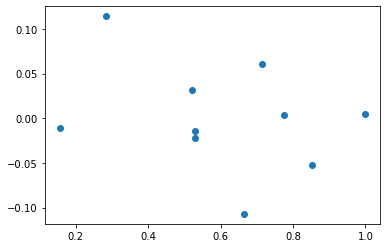

In [52]:
plt.scatter(y_test, residual)
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.plot()

## Histogram of Residual

(array([1., 0., 1., 1., 2., 2., 1., 1., 0., 1.]),
 array([-0.10705104, -0.08492966, -0.06280827, -0.04068689, -0.0185655 ,
         0.00355588,  0.02567727,  0.04779866,  0.06992004,  0.09204143,
         0.11416281]),
 <BarContainer object of 10 artists>)

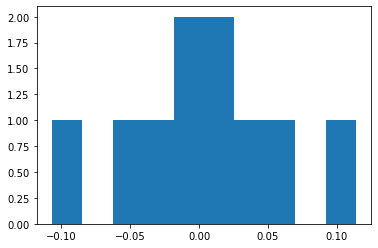

In [53]:
plt.hist(x = residual)

## Distplot

[]

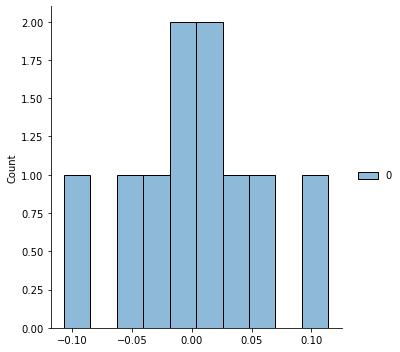

In [54]:
sns.displot(residual, bins = 10)
plt.plot()

# MLR

In [55]:
train_score_lr = lr.score(X_train, y_train)
test_score_lr = lr.score(X_test, y_test)

In [56]:
print("The Train score for Linear Regresion Model is : {}".format(train_score_lr))
print("The test score for LinearRegression Model is : {}".format(test_score_lr))

The Train score for Linear Regresion Model is : 0.9501638048821935
The test score for LinearRegression Model is : 0.9438509847887957


# Find best ALPHA

In [57]:
from sklearn.linear_model import Lasso

In [58]:
alpha = [0.1, 0.01, 0.001, 0.0001]
rtrain = []

In [59]:
for a in alpha:
    lasso = Lasso(alpha = a)
    lasso.fit(X_train, y_train)
    y_train_pred = lasso.predict(X_train)
    rtrain.append(r2_score(y_train, y_train_pred))

In [60]:
rtrain

[0.0, 0.9131711491875277, 0.9489964857481824, 0.9501523022861775]

# LASSO

In [61]:
# Define instance of model
lasso = Lasso(alpha = 0.0001)

In [62]:
# fit model for training
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [63]:
# predict on training data
y_train_pred = lasso.predict(X_train)

In [64]:
# predict on training data
y_train_pred = lasso.predict(X_train)

In [65]:
y_train_pred 

array([0.3321607 , 0.64612942, 0.6528155 , 1.00647995, 0.55460687,
       0.47338342, 0.34150645, 0.30869869, 0.69106987, 0.89851372,
       0.34027438, 0.63652634, 0.23027068, 0.96053887, 0.29843981,
       0.38493266, 0.84057646, 0.24236121, 0.41991235, 0.48280823,
       0.81468741, 0.48246883, 0.57555507, 0.56349794, 0.17886591,
       0.27291042, 0.57108021, 0.47301368, 0.41316431, 0.83146212,
       0.56951484, 0.68478857, 0.57394514, 0.79585926, 0.18118413,
       0.49334803, 0.45879738, 0.7400123 , 0.5462708 , 0.41841414])

In [66]:
r2_train  = r2_score(y_train, y_train_pred)

In [67]:
r2_train

0.9501523022861775

In [68]:
y_pred = lasso.predict(X_test)

In [69]:
r2_test = r2_score(y_test, y_pred)

In [70]:
# comparing scores
print("Train r2 score : ", r2_train)
print("Test r2 score : ", r2_test)

Train r2 score :  0.9501523022861775
Test r2 score :  0.9447110515932705


# Rigde Regression

In [71]:
from sklearn.linear_model import Ridge

In [72]:
reg = Ridge(alpha = 0.0001)

In [73]:
reg.fit(X_train,y_train)

Ridge(alpha=0.0001)

In [74]:
y_train_pred= reg.predict(X_train)

In [75]:
y_train_pred

array([[0.33170842],
       [0.64556459],
       [0.6535626 ],
       [1.00697573],
       [0.55414067],
       [0.47390309],
       [0.34121194],
       [0.30863498],
       [0.69199536],
       [0.89910794],
       [0.34082519],
       [0.63650563],
       [0.22990183],
       [0.96231874],
       [0.29857332],
       [0.38532373],
       [0.84140059],
       [0.2411478 ],
       [0.42102145],
       [0.48311831],
       [0.8149073 ],
       [0.48135011],
       [0.57565331],
       [0.56259195],
       [0.17806933],
       [0.27160381],
       [0.57014748],
       [0.47272715],
       [0.41213468],
       [0.83203859],
       [0.56987585],
       [0.68576248],
       [0.57418853],
       [0.79677389],
       [0.18132541],
       [0.49234679],
       [0.45762716],
       [0.74013832],
       [0.54617008],
       [0.41847194]])

In [76]:
r2_train = r2_score(y_train, y_train_pred)

In [77]:
r2_train

0.950163802734874

In [78]:
y_pred = reg.predict(X_test)

In [79]:
r2_test = r2_score(y_test, y_pred)

In [80]:
print("Train r2 score : ", r2_train)

Train r2 score :  0.950163802734874


In [81]:
print("Test r2 score : ", r2_test)

Test r2 score :  0.9438600276115703
